# Damped harmonic motion - numerical solution

Alastair McLean

The Python code in this Notebook can be used to investigate oscillations in undamped or damped systems. You simply have to choose the appropriate parameters and initial conditions for your system and the code will calculate the response of the system, the velocity of the system and the phase diagram. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

import ipywidgets as widgets

In [2]:
def naturalfrequency(k, m):
    return np.sqrt(k/m)

In [3]:
def dampingcoefficient(dampingratio, k, m):
    return 2*np.sqrt(k/m)*dampingratio*m

In [4]:
def f(y, t, params):
    # unpack current values of y
    x, v = y    
    # unpack parameters
    k, mass, c = params     
    # list of derivatives
    derivs = [v, -(c/mass)*v-(k/mass)*x]    
    return derivs

### The spring constant and mass are defined

In [5]:
k = 40
mass = 0.1

### Make the following plots
Investigate the changes in the response of the system as you systematically change the damping ratio. Can you understand the changes you see? The time interval has been chosed to capture as much of the action as possible. Feel free to change it. 

|Damping Ratio ($\zeta$)|Time Interval (s)   |Response Class|
|:-:|:-:|:-:|
| 0.0   |0.5    |undamped|
| 0.0001|5000.0 |underdamped|
| 0.001 | 500.0 |underdamped|
| 0.01  | 50.0  |underdamped|
| 0.1   | 5.0   |underdamped|
| 0.5   | 1.0   |underdamped|
| 0.8   | 1.0   |underdamped|
| 1.0   | 1.0   |critically damped|
| 2.0   | 1.0   |overdamped|
| 5.0   | 1.0   |overdamped|
| 10.0  | 5.0   |overdamped|


Input the damping ratio ($\zeta$) using the code block directly below. The function ${\tt dampingcoefficient()}$ will calculate the appropriate value of the damping coefficient. 

**Thing about the following questions:**

1. How does the frequency of the system oscillations vary as you increase the damping. Can you think why the frequency might change? After all you are not changing the mass of the system or the spring constant. 
2. Investigate overshoot as you get close to critical damping. Overshoot occurs when the response becomes negative in our case - x0 is positive. At what value of the damping ratio does overshoot totally stop?
3. Investigate what happens when the system is overdamped. Does increasing the damping ratio increase the time the system takes to move back to equilibrium position or not?
4. When the system is overdamped the transition in the bottom right hand corner of the phase plot gets sharper. Can you explain this. 
5. In the overdamped region the maximum value of negative velocity changes as the damping ratio changed. Can you explain this?

You could repeat the above sequence with a different set of initial conditions. For example, you could give the system some initial velocity in either a positive or a negative direction. Of course, you can also change the mass and the period, but you should be able to predict what happens. Increasing the mass will slow the system down. Increasing the spring constant will speed it up. 


In [14]:
dampingratio = 1.0
c = dampingcoefficient(dampingratio, k, mass)
timeinterval = 5

### Initial conditions
It is a linear equation, so everything scales! Lets take the units to be cm. So the intial displacement is 1.0 cm and initial speed is zero.

In [15]:
x0 = 1.00   # displacement
v0 = 0.00   # velocity

Bundle parameters for ODE solver

In [16]:
params = [k, mass, c]

Bundle initial conditions for ODE solver

In [17]:
y0 = [x0, v0]

The time array

In [18]:
t = np.arange(start = 0.0, stop = timeinterval, step = 0.001)

Call the ODE solver

In [19]:
solution = odeint(f, y0, t, args=(params,))

### Plot of the numerical response

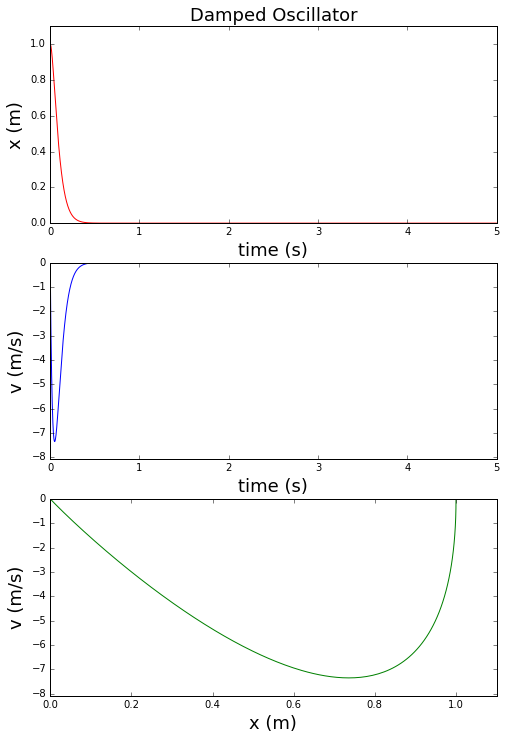

In [20]:
plt.figure(1, figsize=(8,12))

# Plot x(t)
plt.subplot(311)
xmax = 1.1*np.amax(solution[:,0])
xmin = 1.1*np.amin(solution[:,0])
plt.plot(t, solution[:,0],'r-')
plt.xlabel('time (s)', fontsize=18)
plt.ylabel('x (m)', fontsize=18)
plt.ylim(xmin, xmax)
plt.title('Damped Oscillator', fontsize = 18)

# Plot v(t)
plt.subplot(312)
vmax = 1.1*np.amax(solution[:,1])
vmin = 1.1*np.amin(solution[:,1])
plt.plot(t, solution[:,1],'b-')
plt.xlabel('time (s)', fontsize=18)
plt.ylabel('v (m/s)', fontsize=18)
plt.ylim(vmin, vmax)

# Plot v(x)
plt.subplot(313)
plt.plot(solution[:,0], solution[:,1], 'g-')
plt.xlabel('x (m)', fontsize=18)
plt.ylabel('v (m/s)', fontsize=18)
plt.xlim(xmin, xmax)
plt.ylim(vmin, vmax)
# uncomment one of the following lines 
# if you want a png or a pdf file output
# plt.savefig('03b-dampedoscillator.png', dpi=100)
#plt.savefig('03b-dampedoscillator-zeta-0.5.pdf')
# plt.tight_layout()
plt.show()

## Plot of the Phase Diagram
I added this plot of the phase diagram with the $x$ and $v$ axes scaled to the same size. 

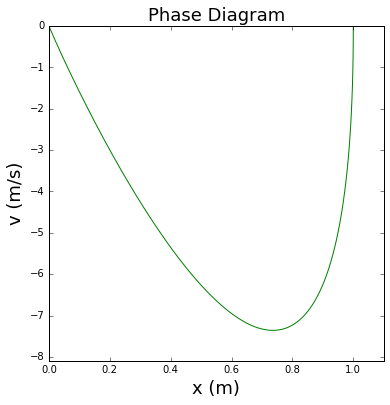

In [21]:
plt.figure(2, figsize=(6,6))
plt.plot(solution[:,0], solution[:,1], 'g-')
plt.xlabel('x (m)', fontsize=18)
plt.ylabel('v (m/s)', fontsize=18)
plt.xlim(xmin, xmax)
plt.ylim(vmin, vmax)
plt.title('Phase Diagram', fontsize=18)
# uncomment if you want a plot of the phase diagram
#plt.savefig('03b-dampedoscillator-phasediagram-zeta-5-0.pdf')
plt.show()